# AutoML classification example

## Requirements
Databricks Runtime for Machine Learning 8.3 or above.

## Census income dataset
This dataset contains census data from the 1994 census database. Each row represents a group of individuals. The goal is to determine whether a group has an income of over 50k a year or not. This classification is represented as a string in the **income** column with values `<=50K` or `>50k`.

In [0]:
from pyspark.sql.types import DoubleType, StringType, StructType, StructField

schema = StructType([
  StructField("age", DoubleType(), False),
  StructField("workclass", StringType(), False),
  StructField("fnlwgt", DoubleType(), False),
  StructField("education", StringType(), False),
  StructField("education_num", DoubleType(), False),
  StructField("marital_status", StringType(), False),
  StructField("occupation", StringType(), False),
  StructField("relationship", StringType(), False),
  StructField("race", StringType(), False),
  StructField("sex", StringType(), False),
  StructField("capital_gain", DoubleType(), False),
  StructField("capital_loss", DoubleType(), False),
  StructField("hours_per_week", DoubleType(), False),
  StructField("native_country", StringType(), False),
  StructField("income", StringType(), False)
])
input_df = spark.read.format("csv").schema(schema).load("/databricks-datasets/adult/adult.data")

## Train/test split

In [0]:
train_df, test_df = input_df.randomSplit([0.99, 0.01], seed=42)
display(train_df)

age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
17.0,?,34019.0,10th,6.0,Never-married,?,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K
17.0,?,34088.0,12th,8.0,Never-married,?,Own-child,White,Female,0.0,0.0,25.0,United-States,<=50K
17.0,?,41643.0,11th,7.0,Never-married,?,Own-child,White,Female,0.0,0.0,15.0,United-States,<=50K
17.0,?,47407.0,11th,7.0,Never-married,?,Own-child,White,Male,0.0,0.0,10.0,United-States,<=50K
17.0,?,48703.0,11th,7.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
17.0,?,48751.0,11th,7.0,Never-married,?,Own-child,Black,Female,0.0,0.0,40.0,United-States,<=50K
17.0,?,67808.0,10th,6.0,Never-married,?,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
17.0,?,80077.0,11th,7.0,Never-married,?,Own-child,White,Female,0.0,0.0,20.0,United-States,<=50K
17.0,?,86786.0,10th,6.0,Never-married,?,Own-child,White,Female,0.0,0.0,40.0,United-States,<=50K
17.0,?,89870.0,10th,6.0,Never-married,?,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K


# Training
The following command starts an AutoML run. You must provide the column that the model should predict in the `target_col` argument.  
When the run completes, you can follow the link to the best trial notebook to examine the training code. This notebook also includes a feature importance plot.

In [0]:
from databricks import automl
summary = automl.classify(train_df, target_col="income", timeout_minutes=30)

2023/02/24 16:08:49 INFO databricks.automl.client.manager: AutoML will optimize for F1 score metric, which is tracked as val_f1_score in the MLflow experiment.
2023/02/24 16:08:51 INFO databricks.automl.client.manager: MLflow Experiment ID: 297346872881265
2023/02/24 16:08:51 INFO databricks.automl.client.manager: MLflow Experiment: https://dbc-00646cc6-55ee.cloud.databricks.com/?o=512145377436569#mlflow/experiments/297346872881265
2023/02/24 16:09:56 INFO databricks.automl.client.manager: Data exploration notebook: https://dbc-00646cc6-55ee.cloud.databricks.com/?o=512145377436569#notebook/297346872881282
2023/02/24 16:39:20 INFO databricks.automl.client.manager: AutoML experiment completed successfully.


,Train,Validation,Test
f1_score,0.724,0.702,0.695
score,0.879,0.869,0.866
recall_score,0.661,0.639,0.633
accuracy_score,0.879,0.869,0.866
log_loss,0.269,0.288,0.284
precision_score,0.800,0.780,0.772
roc_auc_score,0.934,0.924,0.925


The following command displays information about the AutoML output.

In [0]:
help(summary)

Help on AutoMLSummary in module databricks.automl.shared.result object:

class AutoMLSummary(builtins.object)
 |  AutoMLSummary(experiment_id: 'str', trials: 'List[TrialInfo]', semantic_type_conversions: 'Dict[SemanticType, List[str]]' = {}, is_early_stopped: 'bool' = False, output_table_name: 'Optional[str]' = None)
 |  
 |  Summary of an AutoML run, including the MLflow experiment and list of detailed summaries for each trial.
 |  
 |  The MLflow experiment contains high level information, such as the root artifact location, experiment ID,
 |  and experiment tags. The list of trials contains detailed summaries of each trial, such as the notebook and model
 |  location, training parameters, and overall metrics.
 |  
 |  Example usage:
 |      >>> summary.experiment.experiment_id
 |      32639121
 |      >>> len(summary.trials)
 |      10
 |      >>> print(summary.best_trial)
 |      Model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion="gini",
 |                   

# Next steps
- Explore the notebooks and experiments linked above.
- If the metrics for the best trial notebook look good, skip directly to the inference section.
- If you want to improve on the model generated by the best trial:
  - Go to the notebook with the best trial and clone it.
  - Edit the notebook as necessary to improve the model. For example, you might try different hyperparameters.
  - When you are satisfied with the model, note the URI where the artifact for the trained model is logged. Assign this URI to the `model_uri` variable in Cmd 12.

# Inference

You can use the model trained by AutoML to make predictions on new data. The examples below demonstrate how to make predictions on data in pandas DataFrames, or register the model as a Spark UDF for prediction on Spark DataFrames.

In [0]:
model_uri = summary.best_trial.model_path
# model_uri = "<model-uri-from-generated-notebook>"

## pandas DataFrame

In [0]:
import mlflow

# Prepare test dataset
test_pdf = test_df.toPandas()
y_test = test_pdf["income"]
X_test = test_pdf.drop("income", axis=1)

# Run inference using the best model
model = mlflow.pyfunc.load_model(model_uri)
predictions = model.predict(X_test)
test_pdf["income_predicted"] = predictions
display(test_pdf)

age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,income_predicted
17.0,?,64785.0,10th,6.0,Never-married,?,Own-child,White,Male,0.0,0.0,30.0,United-States,<=50K,<=50K
17.0,?,256173.0,10th,6.0,Never-married,?,Own-child,White,Female,0.0,0.0,15.0,United-States,<=50K,<=50K
17.0,Private,166290.0,9th,5.0,Never-married,Other-service,Own-child,White,Female,0.0,0.0,20.0,United-States,<=50K,<=50K
17.0,Private,197850.0,11th,7.0,Never-married,Adm-clerical,Own-child,Asian-Pac-Islander,Female,0.0,0.0,24.0,United-States,<=50K,<=50K
17.0,Private,216137.0,11th,7.0,Never-married,Sales,Own-child,White,Female,0.0,0.0,8.0,United-States,<=50K,<=50K
17.0,Private,234780.0,HS-grad,9.0,Never-married,Farming-fishing,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K,<=50K
18.0,Private,156874.0,12th,8.0,Never-married,Other-service,Own-child,White,Male,0.0,0.0,27.0,United-States,<=50K,<=50K
18.0,Private,178142.0,HS-grad,9.0,Never-married,Craft-repair,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K,<=50K
18.0,Private,231562.0,HS-grad,9.0,Never-married,Sales,Own-child,White,Female,0.0,0.0,33.0,United-States,<=50K,<=50K
18.0,Private,396270.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,25.0,United-States,<=50K,<=50K


## Spark DataFrame

In [0]:
predict_udf = mlflow.pyfunc.spark_udf(spark, model_uri=model_uri, result_type="string")
display(test_df.withColumn("income_predicted", predict_udf()))

age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,income_predicted
17.0,?,64785.0,10th,6.0,Never-married,?,Own-child,White,Male,0.0,0.0,30.0,United-States,<=50K,<=50K
17.0,?,256173.0,10th,6.0,Never-married,?,Own-child,White,Female,0.0,0.0,15.0,United-States,<=50K,<=50K
17.0,Private,166290.0,9th,5.0,Never-married,Other-service,Own-child,White,Female,0.0,0.0,20.0,United-States,<=50K,<=50K
17.0,Private,197850.0,11th,7.0,Never-married,Adm-clerical,Own-child,Asian-Pac-Islander,Female,0.0,0.0,24.0,United-States,<=50K,<=50K
17.0,Private,216137.0,11th,7.0,Never-married,Sales,Own-child,White,Female,0.0,0.0,8.0,United-States,<=50K,<=50K
17.0,Private,234780.0,HS-grad,9.0,Never-married,Farming-fishing,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K,<=50K
18.0,Private,156874.0,12th,8.0,Never-married,Other-service,Own-child,White,Male,0.0,0.0,27.0,United-States,<=50K,<=50K
18.0,Private,178142.0,HS-grad,9.0,Never-married,Craft-repair,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K,<=50K
18.0,Private,231562.0,HS-grad,9.0,Never-married,Sales,Own-child,White,Female,0.0,0.0,33.0,United-States,<=50K,<=50K
18.0,Private,396270.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,25.0,United-States,<=50K,<=50K


## Test
Use the final model to make predictions on the holdout test set to estimate how the model would perform in a production setting. The diagram shows the breakdown between correct and incorrect predictions.

Out[8]: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7fa7149b8910>

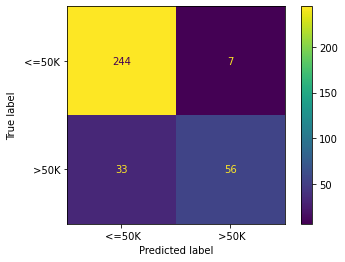

In [0]:
import sklearn.metrics

model = mlflow.sklearn.load_model(model_uri)
sklearn.metrics.plot_confusion_matrix(model, X_test, y_test)